In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [27]:
import numpy as np
import math

spot0 = np.array([[512,671],[730,683],[735, 695],[503,686]], np.int32)
spot1 = np.array([[738,682], [956,676], [981, 693], [743,695]], np.int32)
spot2 = np.array([[971,677], [1162, 670], [1190,681], [995,693]], np.int32)
spot3 = np.array([[1178,670], [1325,655], [1353, 664], [1205,680]], np.int32)
spot4 = np.array([[1342,655], [1444, 644], [1468, 650], [1369, 662]], np.int32)

print "Spot distance in pixels-------------------"
print "Spot0: ", spot0[2][0] - spot0[3][0]
print "Spot1: ", spot1[2][0] - spot1[3][0]
print "Spot2: ", spot2[2][0] - spot2[3][0]
print "Spot3: ", spot3[2][0] - spot3[3][0]
print "Spot4: ", spot4[2][0] - spot4[3][0]

suballSpots = [spot0, spot1, spot2, spot3]

allSpots = []
for x in suballSpots:
    allSpots.append(x[3][0])
    allSpots.append(x[2][0])
print "copy_allSpots: ", allSpots


print "\nraw coordinates---------------------------"
# sp0raw = []
# for s in allSpots:
# 	sp0raw.append(s[3][0])
# 	sp0raw.append((s[2][0]-s[3][0])*float(1)/4 + s[3][0])
# 	sp0raw.append(((s[2][0]-s[3][0])*float(2)/4 + s[3][0]))
# 	sp0raw.append(((s[2][0]-s[3][0])*float(3)/4 + s[3][0]))
# 	sp0raw.append(s[2][0])
# print "sp0raw: ", sp0raw

sp0raw = []
for y in range(0, len(allSpots)-1, 2):
    sp0raw.append(allSpots[y])
    for z in range(1, 4):
        sp0raw.append((allSpots[y+1]-allSpots[y])*float(z)/4 + allSpots[y])
    sp0raw.append(allSpots[y+1])
print "copyyy: ", sp0raw


###
print "\nestimated coordinates---------------------"
standard = [503, 735]
expectedSpace = standard[1]-standard[0]
lineSpace = 8

newScale = [standard[0]]
lineCounter = 0
for n in range(len(sp0raw)):
    if (n+1)%5==0:
        lineCounter +=1
        newScale.append(standard[0]+(expectedSpace*float(n)/4)+(lineSpace*lineCounter))
    else:
        newScale.append(standard[0]+(expectedSpace*float(n+1)/4)+(lineSpace*lineCounter))
newScale.pop()
print "newSca: ", newScale

scaleFactor = [round(newScale[c]/sp0raw[c], 2) for c in range(len(newScale))]
print scaleFactor

sp0raw = np.array(sp0raw)
scaleFactor = np.array(scaleFactor)

print "\nlinear algebra part-----------------------"

sqrsp0 = np.square(sp0raw)
ones = np.ones_like(sp0raw)

X = np.stack([sp0raw, sqrsp0, ones], axis=1)
print X.shape

w = np.linalg.solve(X.T.dot(X), X.T.dot(scaleFactor))
print w

Spot distance in pixels-------------------
Spot0:  232
Spot1:  238
Spot2:  195
Spot3:  148
Spot4:  99
copy_allSpots:  [503, 735, 743, 981, 995, 1190, 1205, 1353]

raw coordinates---------------------------
copyyy:  [503, 561.0, 619.0, 677.0, 735, 743, 802.5, 862.0, 921.5, 981, 995, 1043.75, 1092.5, 1141.25, 1190, 1205, 1242.0, 1279.0, 1316.0, 1353]

estimated coordinates---------------------
newSca:  [503, 561.0, 619.0, 677.0, 735.0, 743.0, 859.0, 917.0, 975.0, 1033.0, 1041.0, 1157.0, 1215.0, 1273.0, 1331.0, 1339.0, 1455.0, 1513.0, 1571.0, 1629.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.07, 1.06, 1.06, 1.05, 1.05, 1.11, 1.11, 1.12, 1.12, 1.11, 1.17, 1.18, 1.19, 1.2]

linear algebra part-----------------------
(20, 3)
[ -1.96755185e-04   2.36720606e-07   1.03414618e+00]


In [28]:
test = np.array([1353, 1353**2, 1])
ytest = test.dot(w)

print ytest
print ytest*1353

1.20127928905
1625.33087809


[[503.0, 253009.0, 1], [561.0, 314721.0, 1], [619.0, 383161.0, 1], [677.0, 458329.0, 1], [735.0, 540225.0, 1], [743.0, 552049.0, 1], [802.5, 644006.25, 1], [862.0, 743044.0, 1], [921.5, 849162.25, 1], [981.0, 962361.0, 1], [995.0, 990025.0, 1], [1043.75, 1089414.0625, 1], [1092.5, 1193556.25, 1], [1141.25, 1302451.5625, 1], [1190.0, 1416100.0, 1], [1205.0, 1452025.0, 1], [1242.0, 1542564.0, 1], [1279.0, 1635841.0, 1], [1316.0, 1731856.0, 1], [1353.0, 1830609.0, 1], [1369.0, 1874161.0, 1], [1393.75, 1942539.0625, 1], [1418.5, 2012142.25, 1], [1443.25, 2082970.5625, 1], [1468.0, 2155024.0, 1]]


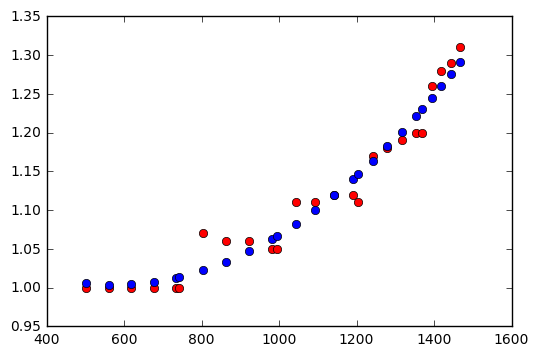

In [17]:
array = []
for x in sp0raw:
    array.append([x, x**2, 1])
    
print array
nparray = np.array(array)

plt.plot(sp0raw, scaleFactor, 'ro')
plt.plot(sp0raw, nparray.dot(w), 'bo')

In [21]:
#Thanks Sam for the help with this part! --Michelle

# sp0raw = np.array([8.0, 76.75, 145.5, 214.25, 283.0,
#                   303.0, 391.25, 479.5, 567.75, 656.0,
#                   670.0, 749.75, 829.50, 909.25, 989.0,
#                   1000.0, 1075.00, 1150.0, 1225.0, 1300.0,
#                   1306.0, 1352.75, 1399.5, 1446.25, 1493.0,
#                   1505.0, 1528.25, 1551.50, 1574.75, 1598.0])

# #rounded scalefactors
# scaleFactor = np.array([1.25, 1.17, 1.17, 1.17, 1.16, 
#                       1.12, 1.07, 1.04, 1.02, 1.01, 
#                       1.0, 1.00, 1.00, 1.00, 1.00,
#                       1.0, 1.00, 1.01, 1.01, 1.02,
#                       1.02, 1.04, 1.06, 1.09, 1.11,
#                       1.10, 1.14, 1.17, 1.21, 1.24])

sp0raw = np.array([78, 212.25, 346.5, 480.75, 615,
                  635, 771.75, 908.5, 1045.25, 1182,
                  1203, 1316.5, 1430, 1543.5, 1657])

# scaleFactor = np.array([0.897, 0.971, 0.988, 0.996, 1.000,
#                        1.0, 0.999, 0.998, 0.998, 0.998,
#                        0.998, 1.015, 1.029, 1.042, 1.053])

scaleFactor = np.array([0.8974358974, 0.9717314488, 0.9884559885, 0.9958398336, 1,
                        1, 0.9993521218, 0.9988992845, 0.9985649366, 0.9983079526,
                        0.9975062344, 1.015001899, 1.0297202797, 1.0422740525, 1.0531080266])

# scaleFactor = np.array([1.25, 1.1726384364820848, 1.168384879725086, 1.1668611435239207, 1.1660777385159011, 
#         1.1221122112211221, 1.073482428115016, 1.0427528675703859, 1.0215763980625274, 
#         1.0060975609756098, 1.0, 1.0003334444814937, 1.0006027727546716, 1.0008248556502612,
#         1.0010111223458038, 1.0, 1.0046511627906978, 1.008695652173913, 1.0122448979591836,
#         1.0153846153846153, 1.0183767228177643, 1.0423211975605249, 1.064665952125759, 1.0855661192739845,
#         1.1051574012056262, 1.1029900332225913, 1.138557173237363, 1.1730583306477602, 1.2065407207493253,
#         1.2390488110137672])



sqrsp0 = np.square(sp0raw)
ones = np.ones_like(sp0raw)

X = np.stack([sp0raw, sqrsp0, ones], axis=1)
print X.shape

w = np.linalg.solve(X.T.dot(X), X.T.dot(scaleFactor))
print w

# test = np.array([989, 989**2, 1])
# test = np.array([635, 635**2, 1])
test = np.array([1493, 1493**2, 1])

# print wsub
ytest = test.dot(w)

print ytest
print ytest*1493

# (30, 3)
# [ -6.41328433e-04   3.65880005e-07   1.26635656e+00]



(15, 3)
[  9.89468130e-05  -2.32858803e-08   9.34503401e-01]
1.03032562443
1538.27615728


[[78.0, 6084.0, 1], [212.25, 45050.0625, 1], [346.5, 120062.25, 1], [480.75, 231120.5625, 1], [615.0, 378225.0, 1], [635.0, 403225.0, 1], [771.75, 595598.0625, 1], [908.5, 825372.25, 1], [1045.25, 1092547.5625, 1], [1182.0, 1397124.0, 1], [1203.0, 1447209.0, 1], [1316.5, 1733172.25, 1], [1430.0, 2044900.0, 1], [1543.5, 2382392.25, 1], [1657.0, 2745649.0, 1]]


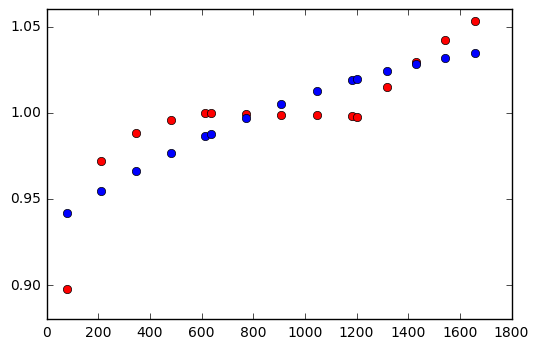

In [22]:
array = []
for x in sp0raw:
    array.append([x, x**2, 1])
    
print array
nparray = np.array(array)

plt.plot(sp0raw, scaleFactor, 'ro')
plt.plot(sp0raw, nparray.dot(w), 'bo')